1.13.1


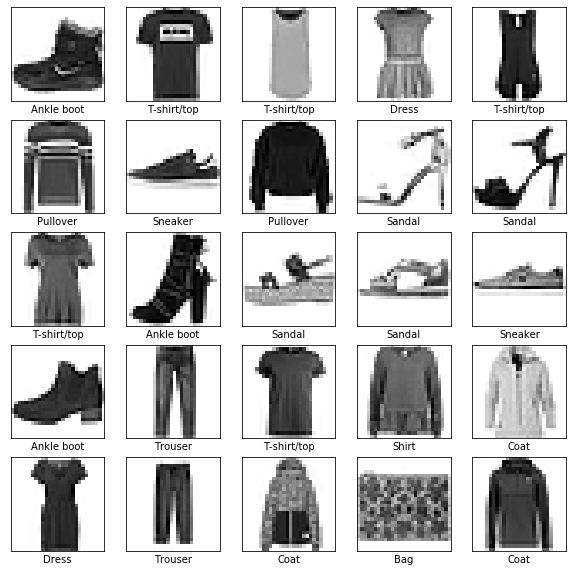

In [2]:
#! /usr/bin/python3

# ==================================================
# Python Embedded Modules
# ==================================================
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import sys, os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print(tf.__version__)

# ==================================================
# Python Custom Modules
# ==================================================
sys.path.append('/home/%s/.pyLib/'%(os.environ.get('USER')))
from nnWoong import *

# ==================================================
# Import the Fashion MNIST dataset
# ==================================================
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# ==================================================
# Explore the data
# ==================================================
train_images.shape
len(train_labels)
test_images.shape
len(test_labels)

# ==================================================
# Preprocessing the data
# ==================================================
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show();

In [3]:
# ==================================================
# Build the model
# ==================================================
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# ==================================================
# Compile the model
# ==================================================
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ==================================================
# Traing the model
# ==================================================
model.fit(train_images, train_labels, epochs=5)

# ==================================================
# Evaluation accuracy
# ==================================================
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4976 - acc: 0.8238
Epoch 2/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3761 - acc: 0.8643
Epoch 3/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3364 - acc: 0.8771
Epoch 4/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3127 - acc: 0.8866
Epoch 5/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2947 - acc: 0.8914


10000/10000 [==============================] - 0s 30us/sample - loss: 0.3606 - acc: 0.8699
Test accuracy: 0.8699


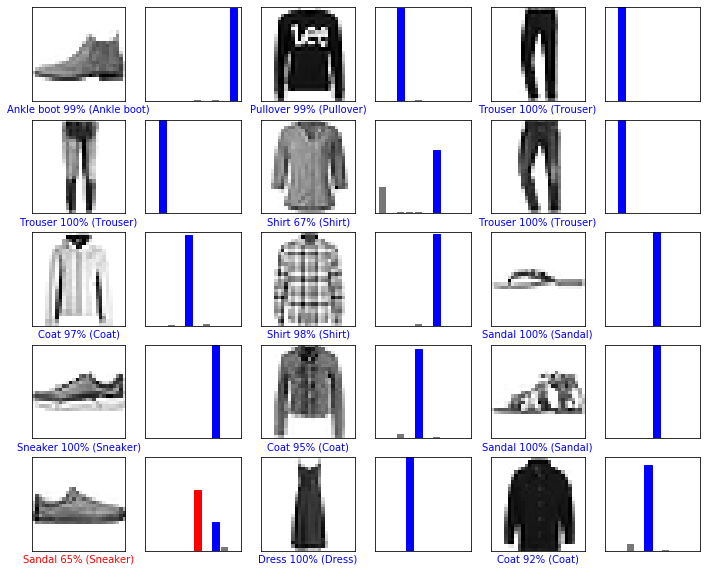

In [4]:
# ==================================================
# Make predictions
# ==================================================
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

# ==================================================
# Make predictions
# ==================================================
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show();

In [6]:
with tf.Session() as sess:
    tf.summary.FileWriter('./log/', sess.graph)